In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IRIS.csv')

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.size

750

In [7]:
df.shape

(150, 5)

In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

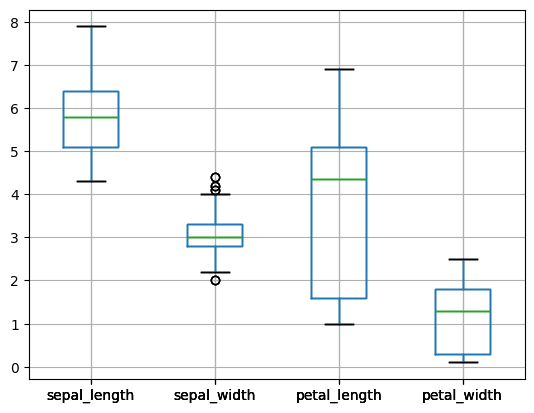

In [13]:
df.boxplot()
plt.show()

In [17]:
df['sw_normalized'] = df['sepal_width']

mean = df['sw_normalized'].mean()
std = df['sw_normalized'].std()

for i in df['sw_normalized']:
    z = (i - mean) / std
    if abs(z) >= 2 : 
        print('Found outlier : ',i)
        


Found outlier :  4.0
Found outlier :  4.4
Found outlier :  4.1
Found outlier :  4.2
Found outlier :  2.0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state = 33)

In [22]:
model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB()

In [24]:
ypred = model.predict(xtest)
ypred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'],
      dtype='<U15')

In [25]:
ypred[:5], ytest.head()

(array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor'], dtype='<U15'),
 96     Iris-versicolor
 65     Iris-versicolor
 29         Iris-setosa
 54     Iris-versicolor
 134     Iris-virginica
 Name: species, dtype: object)

In [30]:
conf = confusion_matrix(ytest, ypred)
print(conf)
TN = conf[0, 0]
FP = conf[0, 1]
FN = conf[1, 0]
TP = conf[1, 1]

TN, FP, FN, TP

[[11  0  0]
 [ 0 15  0]
 [ 0  2 17]]


(11, 0, 0, 15)

In [36]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))



                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.89      0.94        19

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [34]:
print('Accuracy is : ', accuracy_score(ytest, ypred))
print('Error Rate : ', (1-accuracy_score(ytest, ypred)))
print('Precision : ', precision_score(ytest, ypred, average='macro'))
print('Recall : ', recall_score(ytest, ypred, average='macro'))
print('F1 Score : ', f1_score(ytest, ypred, average='macro'))

Accuracy is :  0.9555555555555556
Error Rate :  0.0444444444444444
Precision :  0.9607843137254902
Recall :  0.9649122807017544
F1 Score :  0.9606481481481483


In [33]:
cats = []
for i in ypred : 
    if i not in cats : 
        cats.append(i)

print('Got the classifications as : ',cats)

Got the classifications as :  ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']


In [41]:

from sklearn.datasets import load_iris

iris = load_iris()

iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [42]:
dd = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [43]:
dd.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
y = pd.DataFrame(iris['target'], columns=['target'])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [48]:
df.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa', 3.5],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa', 3.0],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa', 3.2],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa', 3.1],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa', 3.6],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa', 3.9],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa', 3.4],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa', 3.4],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa', 2.9],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa', 3.1],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa', 3.7],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa', 3.4],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa', 3.0],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa', 3.0],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa', 4.0],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa', 4.4],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa', 3.9],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa', 3.5],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa', 3.8],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa', 3.8],
       [5.4, 3.4, 1.

In [49]:
y.values

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    